<a href="https://colab.research.google.com/github/anshikaluniya/Machine-Learning/blob/main/Perceptron_Model_for_OR_Gate_with_legend%20and%20proper%20graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
class Perceptron:
  def __init__(self, ip, lr, epochs):
    self.w = np.zeros((ip+1,1))
    self.lr = lr
    self.epochs = epochs
    self.loss_lst = []

  #It is a step activation function
  def activation(self, z):
    return 1 if z>=0 else 0

  def predict(self, x):
    z = self.w.T.dot(x)
    a = self.activation(z)
    return a

  def fit(self, X, Y):
    for i in range(self.epochs):
      L = 0
      for j in range(Y.shape[0]):
        x = np.insert(X[j], 0, 1)
        x = x.reshape((3,1))
        y = self.predict(x)
        loss = Y[j]-y
        L += loss**2
        self.w += self.lr * loss * x
      L = L/4
      self.loss_lst.append(L)

In [4]:
if __name__ == '__main__':
  X = np.array([
                [0,0],
                [0,1],
                [1,0],
                [1,1]
  ])
  Y = np.array([1,1,1,0])

  model = Perceptron(ip = 2, lr = 0.001, epochs = 100)
  model.fit(X,Y)
  print(model.w)

[[ 0.002]
 [-0.002]
 [-0.001]]


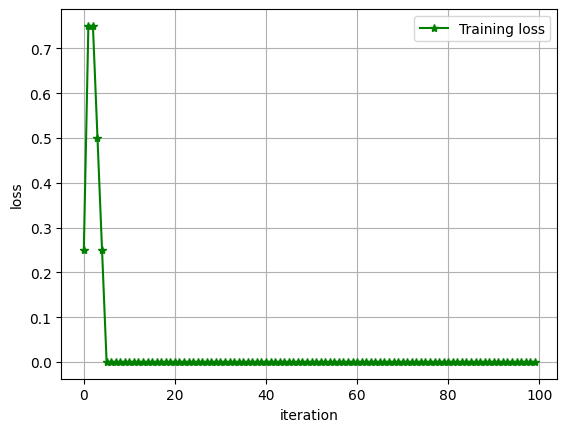

In [18]:
import matplotlib.pyplot as plt
x_axis = [int(x) for x in range(100)]
y_axis = model.loss_lst
plt.plot(x_axis, y_axis, 'g*-', label="Training loss")
plt.grid(True)
plt.legend()
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()